# Assignment 2: Spam Classification with SVM

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
*Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the assignment, you will use SVMs to build your own spam filter. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


---
## 1. PRE-PROCESSING THE DATA (15 pts)

**Data Acquiring:** Download the dataset from https://archive.ics.uci.edu/ml/datasets/Spambase

**Data Splitting:** Put data into the format needed for SVM, then split it into 80% training, 20% testing (each should have approximately the same proportion of position and negative examples).

**Data Discovery:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. 

**Feature Scaling** You can use the standard Scikit-Learn library can write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

In [1]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.
# X_train = [];
# y_train = [];
# X_test = [];
# y_test = [];

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import random

np.random.seed(42)

def load_spam_data(spam_path = '.'):
    csv_path = os.path.join(spam_path,"spambase.data.csv")
    return pd.read_csv(csv_path)

# load dataset
spam = load_spam_data()
spam.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
# check if null value exists
spam_1 = spam
spam_1.isnull().values.any()

False

Data Splitting

In [4]:
# split training and testing data
from sklearn.model_selection import train_test_split

X = spam_1.drop("spam_or_not", axis = 1)
y = spam_1["spam_or_not"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Data Discovery

In [5]:
# Check corrolation
corr_matrix =spam_1.corr()
corr_matrix["spam_or_not"].sort_values(ascending = False)

spam_or_not                   1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capital_run_length_average    0.109999
word_freq_font           

In [6]:
# get index of the 2 columns with biggest corrolation
column = list(spam_1.columns)
sf1 = column.index('word_freq_your')
sf2 = column.index('word_freq_000')
print(sf1)
print(sf2)

20
22


Feature Scaling

In [7]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_train_s

array([[-0.0384418 , -0.16282344, -0.37328359, ...,  0.05102468,
         2.10678454,  2.08342875],
       [-0.34122237, -0.16282344, -0.55060935, ..., -0.10259216,
        -0.21368686, -0.41338467],
       [-0.34122237, -0.16282344,  4.23718633, ..., -0.08668808,
        -0.19458833, -0.19780701],
       ...,
       [-0.34122237, -0.16282344, -0.55060935, ..., -0.08625907,
        -0.2041376 , -0.40631655],
       [-0.34122237,  0.02160941, -0.55060935, ..., -0.1082306 ,
        -0.1898137 , -0.18720483],
       [-0.00479951, -0.16282344,  0.25720803, ..., -0.09906813,
        -0.11341958,  0.10612216]])

In [8]:
y_test_1 = np.array(y_test, dtype=pd.Series)

In [9]:
t_mean = scaler.mean_
t_var = scaler.var_
X_test_s = (X_test - t_mean)/t_var

In [10]:
type(t_var)

numpy.ndarray

- - -
## 2. TRAINING SVM FOR SPAM CLASSIFICATION (15 pts)

Run your linear SVM classifier on the training data, and test the resulting model on the test data. In this section, you may use the default **loss function** (hinge) and **default** value of the C hyperparameter (=1.0):

* Report accuracy, precision, recall?
* Create an ROC curve for this SVM on the test data, using 200 or more evenly spaced thresholds. You may use library function calls to create the ROC curve?

**Implementation Notes:** You do NOT need to add a column of 1's to the $\mathbf{
x}$ matrix to have an intercept term

In [11]:
from sklearn.svm import LinearSVC

# Training your svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(X_train_s, y_train)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0)

In [12]:
# Testing your svm here
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, auc

y_predict = svm_clf.predict(X_test_s)
ac = accuracy_score(y_predict, y_test)
ps = precision_score(y_predict, y_test, average='weighted')
rs = recall_score(y_predict, y_test, average='weighted')
print("accuracy score:", ac)
print("precision score:", ps)
print("recall score:", rs)

accuracy score: 0.8870792616720955
precision score: 0.8980776426809663
recall score: 0.8870792616720955


In [13]:
# calculate prob
y_margins = svm_clf.decision_function(X_test_s)
y_prob = (y_margins - y_margins.min())/(y_margins.max() - y_margins.min())

In [14]:
# create ROC curve
from sklearn import metrics

#thr = np.linspace(1,0,201)    
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)


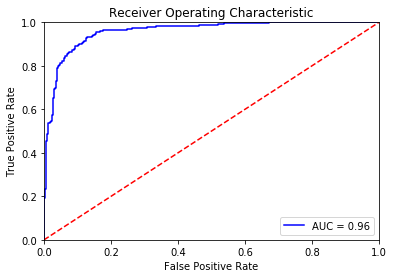

In [15]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- - -
## 3. TUNING C FOR LINEAR SVM (15 pts)
In this part of the assignment, you will try using different values of the C parameter with SVMs. Your task is to try different values of C on this dataset. For example, when C is small, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point. When C is large, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data. 

In a 2-D feature space of your choice, you must be able to plot out the decision boundary of SVM for different values of C to earn credit for this section. Depends on your observation on the dataset, you must provide some justifications on the reason you select a certain value of C to tradeoff margin and data violation. 

In [16]:
# Use the following code to plot out your hyperparameter C
# You may plot multiple decision boundary corresponding to different C
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

X_ = X_train.iloc[:, [20,22]]
y_ = y_train

In [17]:
from sklearn.pipeline import Pipeline

svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)
svm_clf3 = LinearSVC(C=1000, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])
scaled_svm_clf3 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf3),
    ])

scaled_svm_clf1.fit(X_, y_)
scaled_svm_clf2.fit(X_, y_)
scaled_svm_clf3.fit(X_, y_)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [18]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs.iloc[:, 0], svs.iloc[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [19]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
b3 = svm_clf3.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
w3 = svm_clf3.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf3.intercept_ = np.array([b3])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])
svm_clf3.coef_ = np.array([w3])

# Find support vectors (LinearSVC does not do this automatically)
t = y_ * 2 - 1
support_vectors_idx1 = (t * (X_.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X_.dot(w2) + b2) < 1).ravel()
support_vectors_idx3 = (t * (X_.dot(w3) + b3) < 1).ravel()
svm_clf1.support_vectors_ = X_[support_vectors_idx1]
svm_clf2.support_vectors_ = X_[support_vectors_idx2]
svm_clf3.support_vectors_ = X_[support_vectors_idx3]

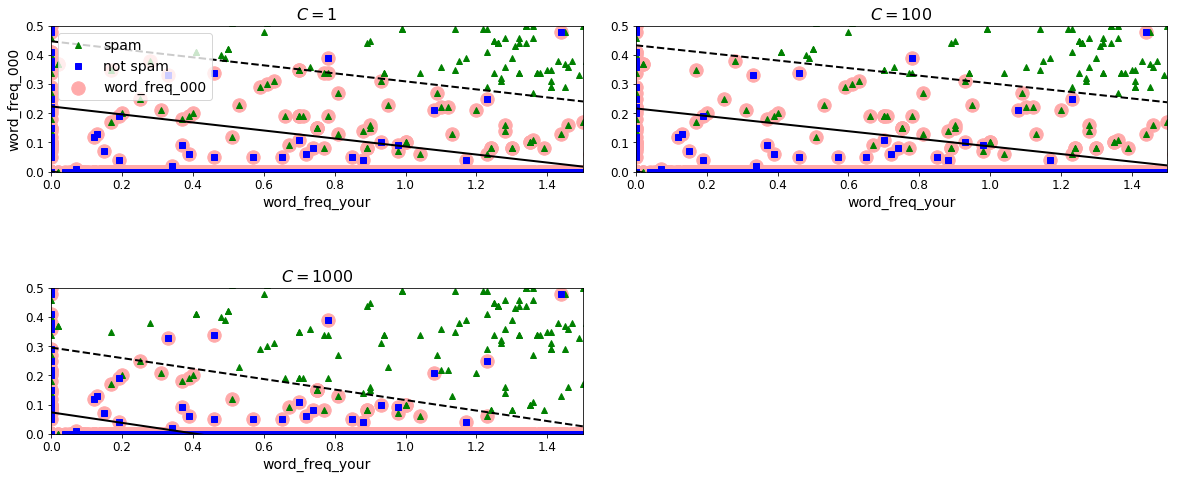

In [20]:
plt.figure(figsize=(20,7.5))
plt.subplot(221)
plt.plot(X_.iloc[:, 0][y_==1], X_.iloc[:, 1][y_==1], "g^", label="spam")
plt.plot(X_.iloc[:, 0][y_==0], X_.iloc[:, 1][y_==0], "bs", label="not spam")
plot_svc_decision_boundary(svm_clf1, 0, 5)
plt.xlabel("word_freq_your", fontsize=14)
plt.ylabel("word_freq_000", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([0, 1.5, 0, 0.5])

plt.subplot(222)
plt.plot(X_.iloc[:, 0][y_==1], X_.iloc[:, 1][y_==1], "g^")
plt.plot(X_.iloc[:, 0][y_==0], X_.iloc[:, 1][y_==0], "bs")
plot_svc_decision_boundary(svm_clf2, 0, 5)
plt.xlabel("word_freq_your", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([0, 1.5, 0, 0.5])

plt.subplot(223)
plt.plot(X_.iloc[:, 0][y_==1], X_.iloc[:, 1][y_==1], "g^")
plt.plot(X_.iloc[:, 0][y_==0], X_.iloc[:, 1][y_==0], "bs")
plot_svc_decision_boundary(svm_clf3, 0, 5)
plt.xlabel("word_freq_your", fontsize=14)
plt.title("$C = {}$".format(svm_clf3.C), fontsize=16)
plt.axis([0, 1.5, 0, 0.5])

plt.subplots_adjust(wspace =0.1, hspace =0.8)
plt.show()

From the decision boundaries above, I think C=100 is the best choice, because it has the best balance between margin and data violation. To be more specific, it has a reasonable margin size and smaller data violation, while C=1000 may result in some bias.

- - -
## 4. SELECTING THE FEATURES WITH SVM (25 pts)

Once your learned a best linear SVM in previous sections, your task in this section is to select the best features. First, you must * Obtain the weight vector $\mathbf{w}$. Then, for the number of features $n = 2$ to 57, you will run the following (in a loop of course):

* Select the set of $n$ features that have the highest $\mathbf{w}_n$
* Train an SVM, $SVM_n$, on all training data, only using these $n$ features with the same hyperparameter C.
* Test $SVM_n$ on the test set (using the same $n$ features) to obtain accuracy.
* Plot accuracy on test data vs. $n$ number of features

In one paragraph, discuss the effects of feature selection including the top 5 features.

In [21]:
# Your feature selection code goes here
# obtain w
from sklearn.svm import LinearSVC
svm = LinearSVC(C=500, loss="hinge", random_state=42) # choose C = 900
svm.fit(X_train_s, y_train)
w = svm.coef_

In [22]:
absw = np.absolute(w)

In [23]:
# create an index row to keep track on the index of features with highest wn
index = np.zeros([1,57])
for i in range(0,57):
    index[0,i] = i+1

In [24]:
new = np.r_[index, absw]

In [25]:
X_t_v = X_train.values
X_t_v1 = np.r_[new, X_t_v]
indxt = (X_t_v1[1]).argsort()
indxt1 = indxt.tolist()
indxt1.reverse()

In [46]:
X_t = X_t_v1[:,indxt1]
X_t_df = pd.DataFrame(X_t)
X_t_df.head(7)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,27.000000,41.000000,25.00000,55.000000,15.000000,23.000000,53.000000,44.000000,49.000000,24.00000,...,8.000000,38.000000,39.000000,9.00000,12.000000,43.000000,10.000000,13.000000,21.000000,2.000000
1,19.989929,3.708571,1.41946,0.730232,0.693501,0.642921,0.582275,0.576638,0.546214,0.53337,...,0.047779,0.045842,0.045676,0.04187,0.041526,0.036738,0.036714,0.029001,0.028451,0.015396
2,0.000000,0.000000,0.00000,6.813000,0.000000,0.390000,0.155000,0.000000,0.000000,0.19000,...,0.000000,0.000000,0.000000,0.19000,0.480000,0.000000,0.290000,0.000000,1.660000,0.000000
3,0.000000,0.000000,0.00000,1.800000,0.000000,0.000000,0.000000,0.000000,0.124000,0.00000,...,0.000000,0.000000,0.000000,0.00000,1.580000,0.790000,0.000000,0.000000,0.790000,0.000000
4,0.000000,0.000000,0.27000,2.319000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.27000,2.160000,0.000000,0.000000,0.000000,1.620000,0.000000
5,0.000000,0.000000,0.00000,48.500000,0.000000,0.000000,0.117000,0.000000,0.000000,0.00000,...,1.310000,0.000000,0.000000,1.31000,0.000000,0.000000,1.310000,0.000000,3.940000,0.000000
6,1.360000,0.000000,0.00000,2.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,1.360000,0.000000,0.000000,0.000000,5.470000,0.000000


In [27]:
# Sorted version of X_train
X_tr = X_t_df.drop([0,1])
X_tr = X_tr.reset_index(drop=True)
#X_tr.head(5)
#data = data[:,data[2].argsort()]

In [28]:
# Sorted version of X_test
X_te_v = X_test.values
X_te_v1 = np.r_[new, X_te_v]
indxte = (X_t_v1[1]).argsort()
indxte1 = indxte.tolist()
indxte1.reverse()
X_te = X_te_v1[:,indxte1]
X_te_df = pd.DataFrame(X_te)
#X_te_df.head(7)

In [29]:
X_te = X_te_df.drop([0,1])
X_te = X_te.reset_index(drop=True)
#X_te.head(5)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# feature selection
accuracy = np.zeros(56)
scaler1 = StandardScaler()
count = 0

for i in range(2,58):
    # construct a new feature set
    X_n = X_tr.iloc[:,:(i-1)]
    scaler1 = StandardScaler()
    X_n_s = scaler1.fit_transform(X_n)
    n_mean = scaler1.mean_
    n_var = scaler1.var_
    svm_n = LinearSVC(C=1, loss="hinge", random_state=42)
    svm_n.fit(X_n_s, y_train)
    X_test_n = X_te.iloc[:, :(i-1)]
    Xt_n_s = (X_test_n - n_mean)/n_var
    y_p_n = svm_n.predict(Xt_n_s)
    ac = accuracy_score(y_p_n, y_test)
    accuracy[i-2] = ac
    count = count+1

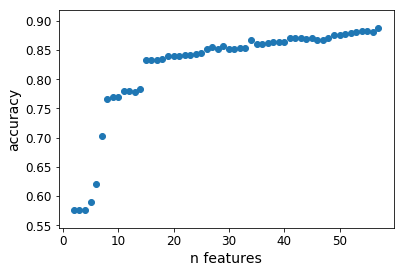

In [31]:
plt.xlabel("n features", fontsize=14)
plt.ylabel("accuracy", fontsize=14)
n = np.zeros(56)
for i in range(0,56):
    n[i] = i+2
plt.scatter(n,accuracy)
plt.show()

# In one paragraph, discuss the effects of feature selection including the top 5 features.

From the accuracy vs n number of features plot, we can tell that as n increases, which means we include more features in model training and predicting, the accuracy is increasing accordingly. If we investigate the effect each new feature has to the model, we will find some features have much stronger influence on the performance of the model, making the accuracy increase sharply at those points.
The top 5 features are the 5,6,7,8 and 15th features, namely "word_freq_our""word_freq_over""word_freq_remove""word_freq_internet" and "word_freq_addresses". 

- - -
## 5. KERNELIZING SVM WITH THE GAUSSIAN RBF (30 pts)

In this part of the asisgnment, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable. 

$
    \mathbf{K}_{RBF}(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \exp(-\gamma ||\mathbf{x}^{(i)} -\mathbf{x}^{(j)}||^2).
$

Your task is to determine the best $C$ and $\gamma$ hyperparameters to use, run SVM on the spam data and report the performance in metrics similar to section 2. By using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for this dataset. 

Finally, run the version of SVM with the best hyperparameters on the test set, and plot out the comparison in terms of accuracy, precision, and recall, and the ROC curve) to those of linear SVM in Section 3. How much your SVM classifier perform better? 

**Implementation Note:** When implementing cross validation to select the best C and $\gamma$ parameter to use, you need to evaluate the error on the cross validation set. Recall that for classification, the error is defined as the fraction of the cross validation examples that were classified incorrectly.




In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from __future__ import print_function
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2,1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
scores = ['accuracy']


In [40]:
print("# Tuning hyper-parameters for accuracy")
print()

clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='accuracy')
clf.fit(X_train_s, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()

print("Detailed classification reiiport:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test_s)
print(classification_report(y_true, y_pred))
print()


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.929 (+/-0.022) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.900 (+/-0.018) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.797 (+/-0.011) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.932 (+/-0.026) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.926 (+/-0.021) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.898 (+/-0.015) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.925 (+/-0.009) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.935 (+/-0.026) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.922 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.916 (+/-0.015) for {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.935 (+/-0.024) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.931 (+/-0.028) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification reiiport:

The model is trained on 

In [36]:
print(clf.best_score_)

0.9347826086956522


In [43]:
# use the best parameters
best = SVC(kernel="rbf", gamma=0.001, C=1000)
best.fit(X_train_s, y_train)
y_b_p = best.predict(X_test_s)

In [44]:
#  accuracy, precision and recall
print('accuracy:', accuracy_score(y_b_p, y_test))
print('precision:', precision_score(y_b_p, y_test))
print('recall:', recall_score(y_b_p, y_test))

accuracy: 0.8208469055374593
precision: 0.5923076923076923
recall: 0.9746835443037974


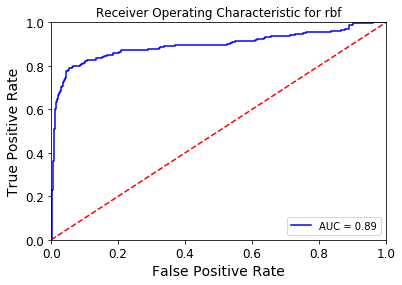

In [45]:
# plot ROC
from sklearn.metrics import roc_curve, auc

y_margins = best.decision_function(X_test_s)
y_prob = (y_margins - y_margins.min())/(y_margins.max() - y_margins.min())

fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for rbf')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 2:...".

Best of luck and have fun!